https://stepik.org/lesson/1370103/step/1

https://github.com/selfedu-rus/machine_learning/blob/main/machine_learning_20_1_svm.py

[ 0.00635516  0.24431486 -0.13072144]
[[ 1. 20. 45.]
 [ 1. 20. 30.]
 [ 1. 30. 45.]]


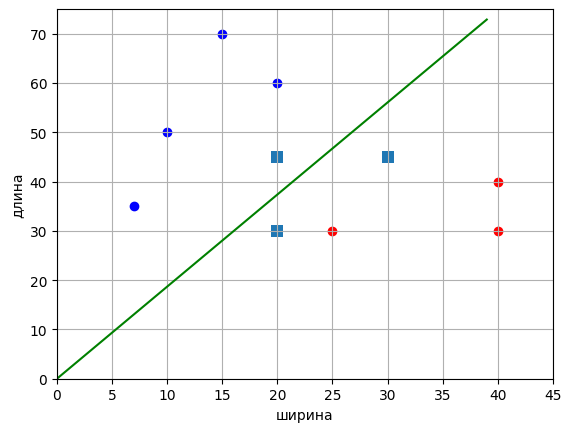

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Данные
x_train = [[10, 50], [20, 30], [25, 30], [20, 60],
           [15, 70], [40, 40], [30, 45], [20, 45],
           [40, 30], [7, 35]]
# добавляем искусственного столбца для удобства работы с матрицами
x_train = [[1] + x for x in x_train]
# Метки классов для каждой точки: -1 и 1
y_train = [-1, 1, 1, -1, -1, 1, 1, -1, 1, -1]

# Создаем объект классификатора SVM с линейным ядром
clf = svm.SVC(kernel='linear')

# Обучаем этот классификатор на обучающих данных
clf.fit(x_train, y_train)

# # Создаем объект линейного классификатора (Linear Support Vector Classification)
lin_clf = svm.LinearSVC()

# Обучаем линейный классификатор на тех же данных
lin_clf.fit(x_train, y_train)

# Получаем опорные векторы из обученного SVM классификатора
v = clf.support_vectors_

# Получаем коэффициенты (веса) модели линейного классификатора
w = lin_clf.coef_[0]

# Выводим на экран коэффициенты и опорные векторы
print(w, v, sep='\n')

# формирование графиков для визуализации полученных результатов
x_train = np.array(x_train)
y_train = np.array(y_train)
line_x = list(range(max(x_train[:, 1])))    # формирование графика разделяющей линии
line_y = [-x*w[1]/w[2] - w[0] for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 1], x_0[:, 2], color='red')
plt.scatter(x_1[:, 1], x_1[:, 2], color='blue')
plt.scatter(v[:, 1], v[:, 2], s=70, edgecolor=None, linewidths=0, marker='s')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

https://github.com/selfedu-rus/machine_learning/blob/main/machine_learning_20_2_svm.py

[-2  2  0  0  0  0  0  0  0  0  0  0]
[[30. 10.  1.]
 [20. 60.  1.]
 [20. 45.  1.]
 [ 7. 35.  1.]
 [15. 50.  1.]
 [20. 30.  1.]
 [25. 30.  1.]
 [30. 45.  1.]]


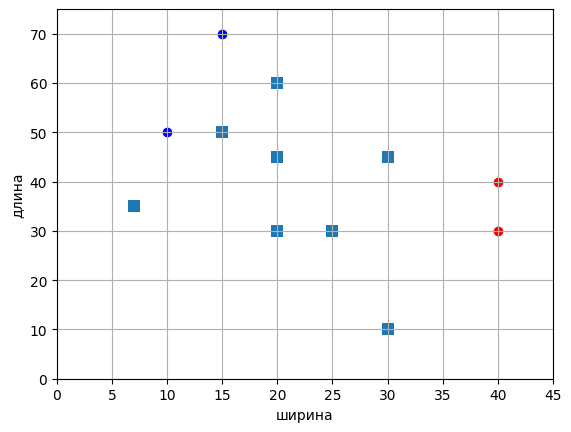

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[30, 10], [15, 50], [10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
y_train = [-1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1]

clf = svm.SVC(kernel='linear')  # SVM с линейным ядром
clf.fit(x_train, y_train)  # нахождение вектора w по обучающей выборке
y_pr = clf.predict(x_train)  # проверка на обучающей выборке
print(np.array(y_train) - np.array(y_pr))  # нули - без ошибок; иначе - ошибка

v = clf.support_vectors_  # выделение опорных векторов
print(v)

# формирование графиков для визуализации полученных результатов
x_train = np.array(x_train)
y_train = np.array(y_train)

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.scatter(v[:, 0], v[:, 1], s=70, edgecolor=None, linewidths=0, marker='s')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()